/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricW

Accuracy: 0.10738255033557047
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00     

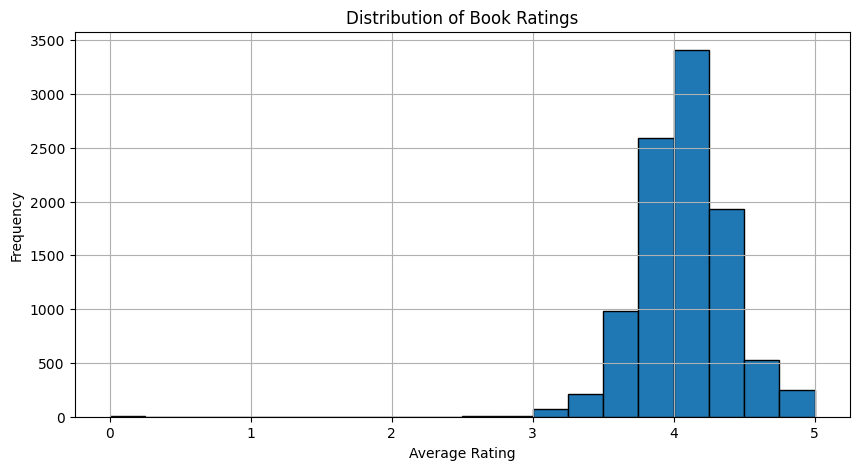

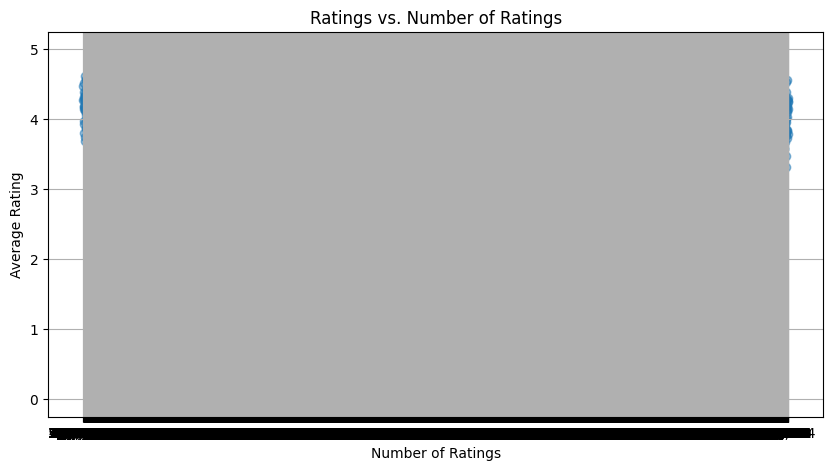

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load Dataset
file_path = 'goodreads_data.csv'
df = pd.read_csv(file_path)

# Sample Data Preparation
df_sample = df.dropna(subset=['Description'])
df_sample = df_sample[df_sample['Genres'].notna()]
df_sample = df_sample.sample(frac=0.1, random_state=42)  # Sample 10% of the data

# Convert genres to numeric codes
df_sample['Genres'] = df_sample['Genres'].astype('category').cat.codes

# Feature extraction
vectorizer = CountVectorizer(max_features=500)  # Reduce the number of features
X = vectorizer.fit_transform(df_sample['Description'])
y = df_sample['Genres']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = MultinomialNB()  # Use a simpler model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Visualizations
# Histogram of book ratings
plt.figure(figsize=(10, 5))
plt.hist(df['Avg_Rating'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter plot of Ratings vs. Number of Ratings
plt.figure(figsize=(10, 5))
plt.scatter(df['Num_Ratings'].dropna(), df['Avg_Rating'].dropna(), alpha=0.5)
plt.title('Ratings vs. Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Load Dataset
file_path = 'goodreads_data.csv'
df = pd.read_csv(file_path)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()

# Sample a smaller portion of the data for demonstration
df_sample = df.sample(n=2000, random_state=42)  # Adjust n as needed

# Prepare data for classification
df_sample = df_sample[['Description', 'Genres']].copy()

# Convert 'Genres' to numeric codes
df_sample['Genres'] = df_sample['Genres'].astype('category').cat.codes

# Define features and labels
X = df_sample['Description']
y = df_sample['Genres']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize Text Data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model Training
model = SGDClassifier(max_iter=1000, loss='log', random_state=42)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)  # Adjust zero_division to handle undefined metrics

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Missing values in each column:
Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64


<class 'ValueError'>: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.